#### Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import math
import os
import sys

In [2]:
# get the updated custom functions automatically
%load_ext autoreload
%autoreload 2

nb_dir = os.path.split(os.getcwd())[0]
nb_dir
print(nb_dir)

if nb_dir not in sys.path:
    print("Nb dir is not in system path")
    sys.path.append(nb_dir)
else:
    print("Nb dir is already in system path")

d:\CodingHenry\quant\pyquant-research
Nb dir is not in system path


#### Formula
The RSI uses a two-part calculation that starts with the following formula.

The average gain or loss used in this calculation is the average percentage gain or loss during a look-back period. The formula uses a positive value for the average loss. Periods with price losses are counted as zero in the calculations of average gain. Periods with price increases are counted as zero in the calculations of average loss.

The standard number of periods used to calculate the initial RSI value is 14.

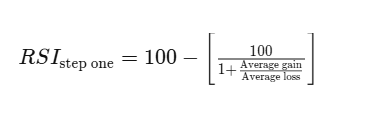

Once there are 14 periods of data available, the second calculation can be done. Its purpose is to smooth the results so that the RSI only nears 100 or zero in a strongly trending market

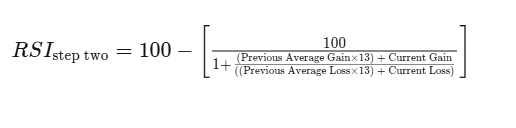

#### Get Data Series

In [3]:
# get spy etf data
appl = yf.Ticker("AAPL")
appl = appl.history(auto_adjust=False)
appl = appl.sort_index(ascending=True)
appl

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2025-04-24 00:00:00-04:00,204.889999,208.830002,202.940002,208.369995,208.097107,47311000,0.00,0.0
2025-04-25 00:00:00-04:00,206.369995,209.750000,206.199997,209.279999,209.005920,38222300,0.00,0.0
2025-04-28 00:00:00-04:00,210.000000,211.500000,207.460007,210.139999,209.864792,38743100,0.00,0.0
2025-04-29 00:00:00-04:00,208.690002,212.240005,208.369995,211.210007,210.933395,36827600,0.00,0.0
2025-04-30 00:00:00-04:00,209.300003,213.580002,206.669998,212.500000,212.221710,52286500,0.00,0.0
2025-05-01 00:00:00-04:00,209.080002,214.559998,208.899994,213.320007,213.040634,57365700,0.00,0.0
2025-05-02 00:00:00-04:00,206.089996,206.990005,202.160004,205.350006,205.081070,101010600,0.00,0.0
2025-05-05 00:00:00-04:00,203.100006,204.100006,198.210007,198.889999,198.629532,69018500,0.00,0.0
2025-05-06 00:00:00-04:00,198.210007,200.649994,197.020004,198.509995,198.250015,51216500,0.00,0.0


#### Calculate RSI

In [4]:
from utils.indicators import calculate_rsi_ema

rsi_values = calculate_rsi_ema(appl)
print(rsi_values)

Date
2025-04-24 00:00:00-04:00          NaN
2025-04-25 00:00:00-04:00          NaN
2025-04-28 00:00:00-04:00          NaN
2025-04-29 00:00:00-04:00          NaN
2025-04-30 00:00:00-04:00          NaN
2025-05-01 00:00:00-04:00          NaN
2025-05-02 00:00:00-04:00          NaN
2025-05-05 00:00:00-04:00          NaN
2025-05-06 00:00:00-04:00          NaN
2025-05-07 00:00:00-04:00          NaN
2025-05-08 00:00:00-04:00          NaN
2025-05-09 00:00:00-04:00          NaN
2025-05-12 00:00:00-04:00          NaN
2025-05-13 00:00:00-04:00    62.168603
2025-05-14 00:00:00-04:00    60.796111
2025-05-15 00:00:00-04:00    58.747529
2025-05-16 00:00:00-04:00    58.290823
2025-05-19 00:00:00-04:00    52.548546
2025-05-20 00:00:00-04:00    48.560148
2025-05-21 00:00:00-04:00    40.363610
2025-05-22 00:00:00-04:00    39.271138
2025-05-23 00:00:00-04:00    31.589636
Name: Close, dtype: float64


#### Plotting RSI

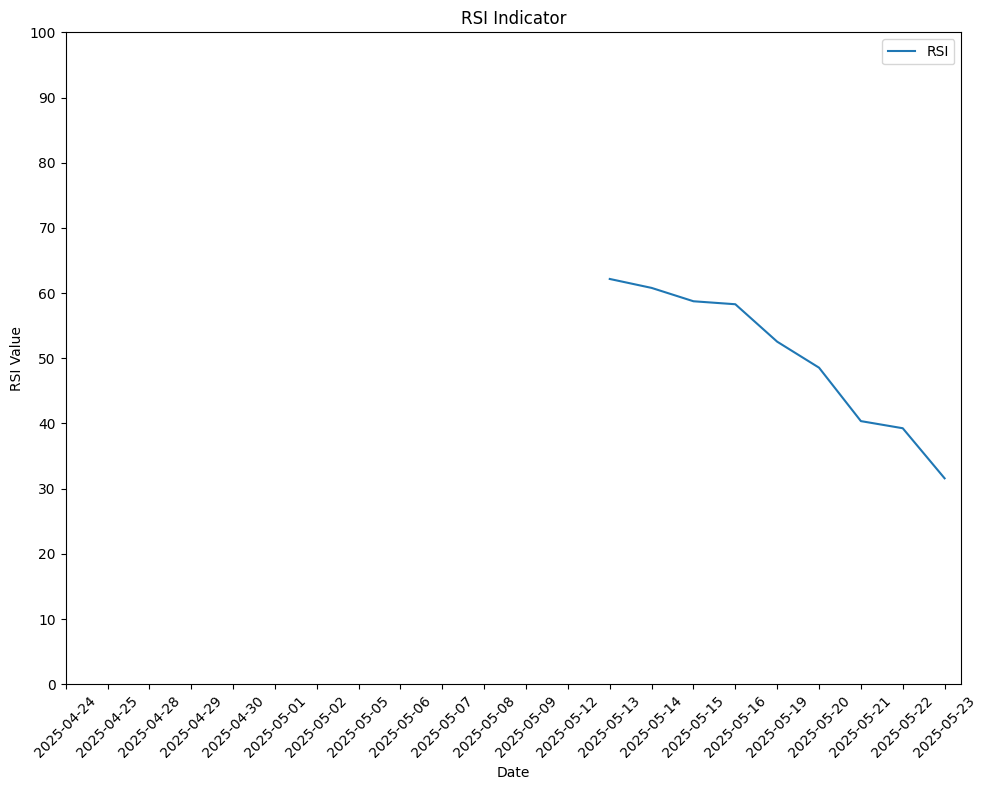

In [5]:
from utils.visualize import plot_RSI

plot_RSI(data=appl,
         rsi_values=rsi_values)

### Backtest